#### Análisis y Procesamiento de Señales

# Tarea Semanal N°1
## *Síntesis de señales*


#### Augusto Colugnatti

## Introducción teórica
A lo largo de este trabajo se analizaron y operaron diversas señales, de las cuales gran parte fueron ondas sinusoidales. Una onda sinusoidal se evalúa a lo largo de una variable real (en este caso, el tiempo) y admite los siguientes parámetros: amplitud, frecuencia, fase y valor medio. Por lo tanto, para trabajar con funciones de este tipo, fue necesario implementar un generador de las mismas según su definición:

\begin{equation}
\sin (t) = A \cdot \sin (2\pi \cdot f \cdot t + \phi) + v_m
\end{equation}

Una vez sintetizadas y graficadas las distintas señales, se buscó verificar la ortogonalidad entre ellas, es decir, si el producto interno es nulo.
El producto interno entre dos funciones se define como

\begin{equation}
\langle f(t), g(t) \rangle = \int_{a}^{b} f(t) g(t) \,dt
\end{equation}

De ser ortogonales entre sí, significa que, en un determinado intervalo [a , b], no hay proyección alguna de una función sobre la otra (pensar en dos vectores perpendiculares). En cierta forma, la información que brinda una de ellas no puede ser obtenida por la otra, pues son funciones "independientes". Tener en cuenta que, al estar trabajando con un cantidad finita *N* de muestras, esta expresión pueden ser reescrita por una sumatoria, tal que

\begin{equation}
\langle \mathbf{f}[k], \mathbf{g}[k] \rangle = \sum_{n=1}^{N} f_n g_n
\end{equation}

es ni más ni menos que la suma de los productos componente a componente de los vectores f[k] y g[k].

Otro aspecto que nos interesa analizar es la correlación entre las señales. Esta es una herramienta que me permite "medir" la similitud entre dos funciones en base al desplazamiento de alguna de ellas sobre la otra. Matemáticamente se define como

\begin{equation}
(f \star g)(\tau) = \int_{-\infty}^{\infty} f(t) \overline{g(t-\tau)} \, dt
\end{equation}

siendo $ \overline{g(t-\tau)} $ el conjugado complejo  de la función g(t) desplazada en $ \tau $. De la misma manera, podemos llegar a su versión discretizada si consideramos como soporte no todo el intervalo real sino una cantidad *N* de muestras:

\begin{equation}
(f \star g)[k] = \sum_{n=0}^{N-1} f[n] \overline{g[n-k]}
\end{equation}

## Desarrollo
#### *Definiciones y preparación del entorno*

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sp
from scipy.io import wavfile

def eje_temporal (N, fs):
    
    Ts = 1/fs
    t_final = N * Ts # su inversa es la resolución espectral
    tt = np.arange (0, t_final, Ts) # defino una sucesión de valores para el tiempo
    return tt

def func_senoidal (amp, frec, fase, tt, v_medio):
    
    xx = amp * np.sin (2 * np.pi * frec * tt + fase) + v_medio # tt es un vector, por ende la función np.sin se evalúa para cada punto del mismo
    # xx tendrá la misma dimensión que tt
    return xx


### Inicializo variables ###

amplitud = 0
frec = 0
fase = 0
N = 500
fs = 100000
v_medio = 0

print ("\nSe toman 500 muestras con una frecuencia de muestreo de 100KHz para todas las señales \n")

tt = eje_temporal (N, fs)


Se toman 500 muestras con una frecuencia de muestreo de 100KHz para todas las señales 



#### 1) *Síntesis de señales*

La potencia de la señal 1 es de 0.5000000000000001 [magnitud]/seg


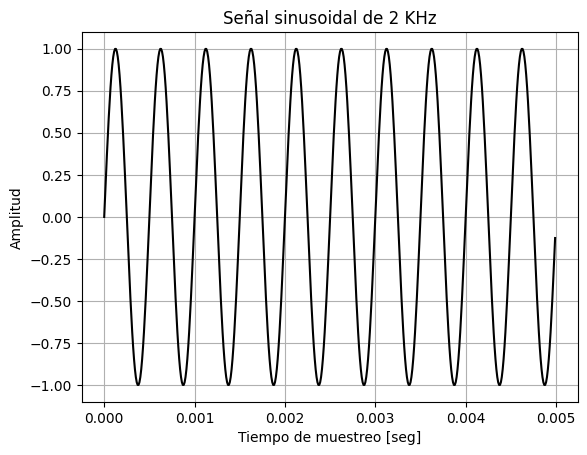

In [23]:
### Señal 1 ###

ss_1 = func_senoidal (1, 2000, 0, tt, 0)

plt.plot (tt, ss_1, linestyle='-', color='black')
plt.title ("Señal sinusoidal de 2 KHz")
plt.xlabel ("Tiempo de muestreo [seg]")
plt.ylabel ("Amplitud")
plt.grid (True)

print ("La potencia de la señal 1 es de", np.sum (ss_1**2)/N, "[magnitud]/seg")

La potencia de la señal 2 es de 49.999999999999986 [magnitud]/seg


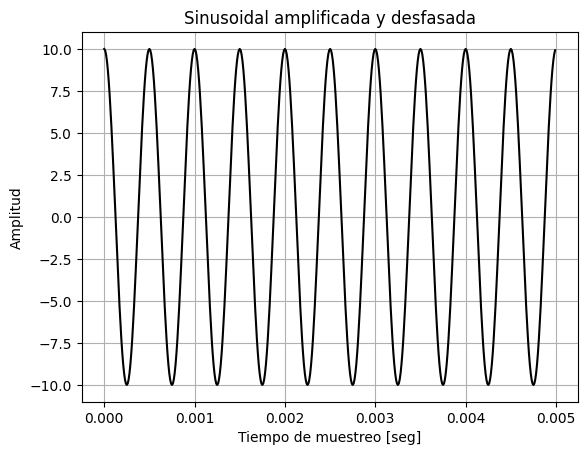

In [24]:
### Señal 2 ###

ss_2 = func_senoidal (10, 2000, np.pi/2, tt, 0)

plt.plot (tt, ss_2, linestyle='-', color='black')
plt.title ("Sinusoidal amplificada y desfasada")
plt.xlabel ("Tiempo de muestreo [seg]")
plt.ylabel ("Amplitud")
plt.grid (True)

print ("La potencia de la señal 2 es de", np.sum (ss_2**2)/N, "[magnitud]/seg")

La potencia de la señal 3 es de 25.0 [magnitud]/seg


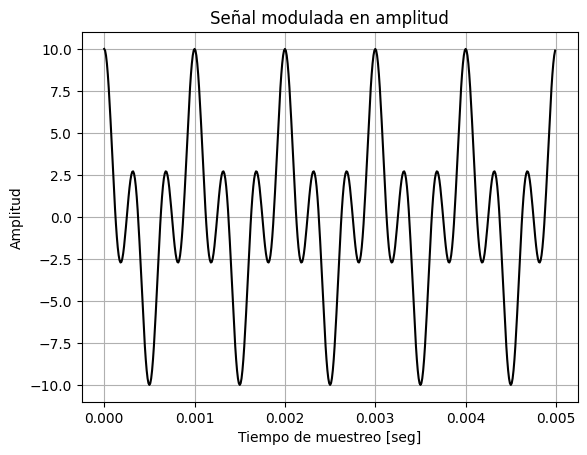

In [25]:
### Señal 3 ###

moduladora = func_senoidal (1, 1000, np.pi/2, tt, 0)
ss_3 = moduladora * ss_2

plt.plot (tt, ss_3, linestyle='-', color='black')
plt.title ("Señal modulada en amplitud")
plt.xlabel ("Tiempo de muestreo [seg]")
plt.ylabel ("Amplitud")
plt.grid (True)

print ("La potencia de la señal 3 es de", np.sum (ss_3**2)/N, "[magnitud]/seg")

La potencia de la señal 4 es de 0.3707402889009135 [magnitud]/seg


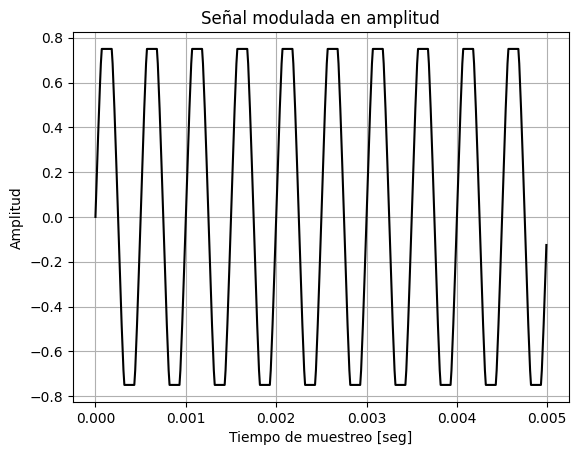

In [26]:
### Señal 4 ###

recorte = 0.75 * 1
ss_4 = np.clip (ss_1, -recorte, recorte)

plt.plot (tt, ss_4, linestyle='-', color='black')
plt.title ("Señal modulada en amplitud")
plt.xlabel ("Tiempo de muestreo [seg]")
plt.ylabel ("Amplitud")
plt.grid (True)

print ("La potencia de la señal 4 es de", np.sum (ss_4**2)/N, "[magnitud]/seg")

La potencia de la señal 5 es de 1.0 [magnitud]/seg


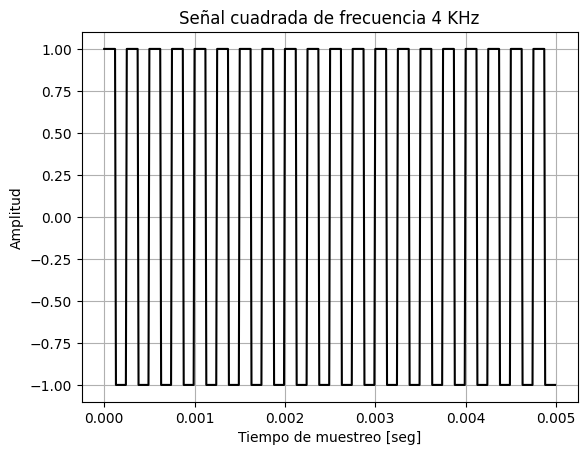

In [27]:
### Señal 5 ###

ss_5 = sp.square (2 * np.pi * 4000 * tt)

plt.plot (tt, ss_5, linestyle='-', color='black')
plt.title ("Señal cuadrada de frecuencia 4 KHz")
plt.xlabel ("Tiempo de muestreo [seg]")
plt.ylabel ("Amplitud")
plt.grid (True)

print ("La potencia de la señal 5 es de", np.sum (ss_5**2)/N, "[magnitud]/seg")

La potencia de la señal 6 es de 1.0 [magnitud]/seg


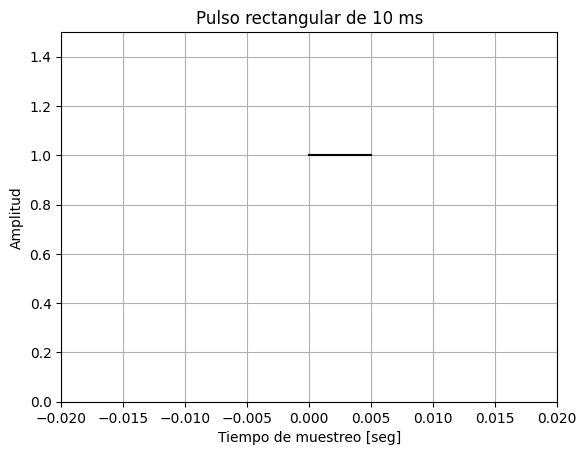

In [28]:
### Señal 6 ###

pulso = np.zeros (len(tt))
duracion = 0.01
flanco_subida = 0
flanco_bajada = flanco_subida + duracion

pulso [(tt >= flanco_subida) & (tt <= flanco_bajada)] = 1
# esto hace que el vector tome el valor 1 para los índices que cumplen la condición que figura entre []

plt.plot (tt, pulso, linestyle='-', color='black')
plt.title ("Pulso rectangular de 10 ms")
plt.xlabel ("Tiempo de muestreo [seg]")
plt.ylabel ("Amplitud")
plt.xlim (-0.02, 0.02)
plt.ylim (0, 1.5)
plt.grid (True)

print ("La potencia de la señal 6 es de", np.sum (pulso**2)/N, "[magnitud]/seg")

En el gráfico superior el pulso parece ser de 5ms, esto sucede porque mi eje temporal (definido con una cantidad de muestras N = 500 y una frecuencia de muestreo fs = 100Khz) va de 0 a 5ms. Sin embargo, quisiera mantener la resolución espectral, pues considero que permite visualizar de forma "agradable" las señales anteriores. Por lo tanto, introduzco un breve inciso para mostrar correctamente dicho pulso.

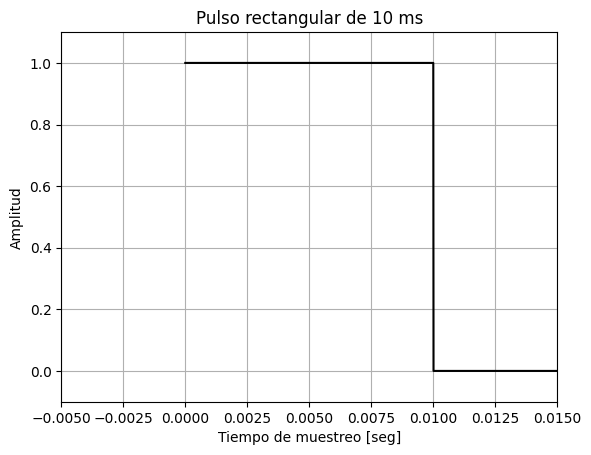

In [29]:
tt_pulso = eje_temporal (2000, 100000)

pulso_2 = np.zeros (len(tt_pulso))
duracion = 0.01
flanco_subida = 0
flanco_bajada = flanco_subida + duracion

pulso_2 [(tt_pulso >= flanco_subida) & (tt_pulso <= flanco_bajada)] = 1

plt.plot (tt_pulso, pulso_2, linestyle='-', color='black')
plt.title ("Pulso rectangular de 10 ms")
plt.xlabel ("Tiempo de muestreo [seg]")
plt.ylabel ("Amplitud")
plt.xlim (-0.005, 0.015)
plt.ylim (-0.1, 1.1)
plt.grid (True)

#### 2) *Verificando ortogonalidad entre las señales*

In [30]:
print ("Producto interno entre las señales 1 y 2 ->", np.inner (ss_1, ss_2), "-> por lo tanto", end = " ")
if (np.isclose (np.inner (ss_1, ss_2), 0)):
    print ("SON ortogonales")
else:
    print ("NO son ortogonales")
    
print ("Producto interno entre las señales 1 y 3 ->", np.inner (ss_1, ss_3), "-> por lo tanto", end = " ")
if (np.isclose (np.inner (ss_1, ss_3), 0)):
    print ("SON ortogonales")
else:
    print ("NO son ortogonales")
    
print ("Producto interno entre las señales 1 y 4 ->", np.inner (ss_1, ss_4), "-> por lo tanto", end = " ")
if (np.isclose (np.inner (ss_1, ss_4), 0)):
    print ("SON ortogonales")
else:
    print ("NO son ortogonales")
    
print ("Producto interno entre las señales 1 y 5 ->", np.inner (ss_1, ss_5), "-> por lo tanto", end = " ")
if (np.isclose (np.inner (ss_1, ss_5), 0)):
    print ("SON ortogonales")
else:
    print ("NO son ortogonales")
    
print ("Producto interno entre las señales 1 y 6 ->", np.inner (ss_1, pulso), "-> por lo tanto", end = " ")
if (np.isclose (np.inner (ss_1, pulso), 0)):
    print ("SON ortogonales")
else:
    print ("NO son ortogonales")

Producto interno entre las señales 1 y 2 -> -2.262856568790994e-12 -> por lo tanto SON ortogonales
Producto interno entre las señales 1 y 3 -> 4.218847493575595e-14 -> por lo tanto SON ortogonales
Producto interno entre las señales 1 y 4 -> 213.9013059363349 -> por lo tanto NO son ortogonales
Producto interno entre las señales 1 y 5 -> -4.2549297418759124e-14 -> por lo tanto SON ortogonales
Producto interno entre las señales 1 y 6 -> -1.0963452368173421e-14 -> por lo tanto SON ortogonales


#### 3) *Correlación entre las señales*

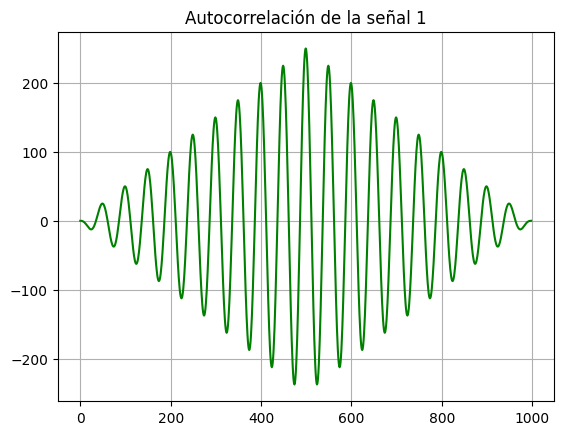

In [31]:
### Autocorrelación de la primera señal ###

correlacion_11 = np.correlate (ss_1, ss_1, mode = 'full') # esto me devuelve un vector de la misma dimensión que ss_1
plt.plot (np.arange (len(correlacion_11)), correlacion_11, linestyle='-', color='green')
plt.title ("Autocorrelación de la señal 1")
plt.grid (True)

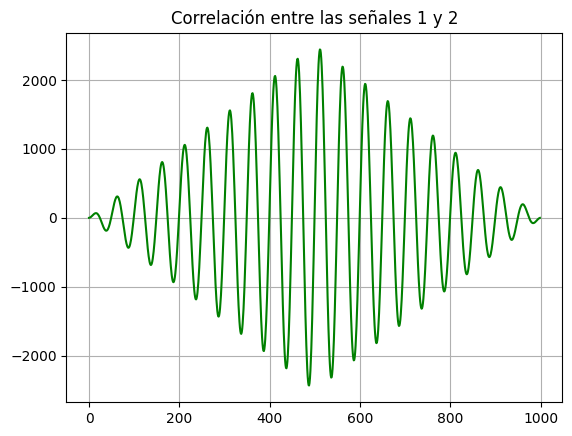

In [32]:
### Correlación entre las señales 1 y 2 ###

correlacion_12 = np.correlate (ss_1, ss_2, mode = 'full')
plt.plot (np.arange (len(correlacion_12)), correlacion_12, linestyle='-', color='green')
plt.title ("Correlación entre las señales 1 y 2")
plt.grid (True)

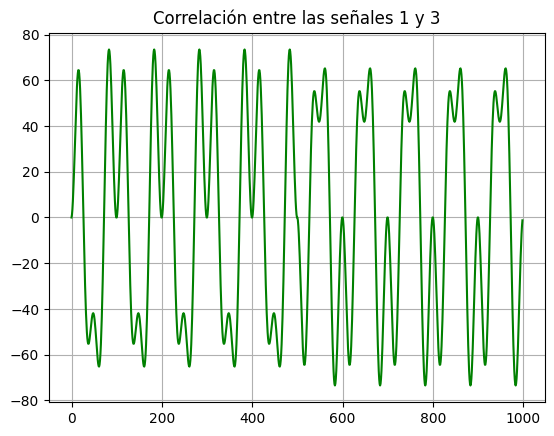

In [33]:
### Correlación entre las señales 1 y 3 ###

correlacion_13 = np.correlate (ss_1, ss_3, mode = 'full')
plt.plot (np.arange (len(correlacion_13)), correlacion_13, linestyle='-', color='green')
plt.title ("Correlación entre las señales 1 y 3")
plt.grid (True)

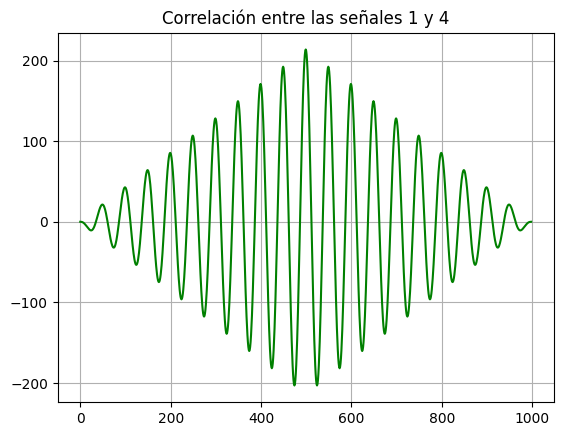

In [34]:
### Correlación entre las señales 1 y 4 ###

correlacion_14 = np.correlate (ss_1, ss_4, mode = 'full')
plt.plot (np.arange (len(correlacion_14)), correlacion_14, linestyle='-', color='green')
plt.title ("Correlación entre las señales 1 y 4")
plt.grid (True)

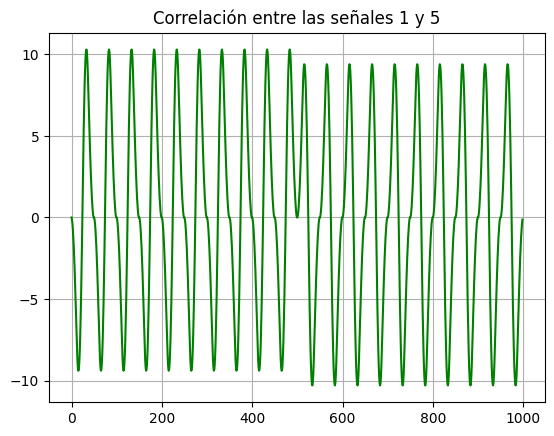

In [35]:
### Correlación entre la señales 1 y 5 ###

correlacion_15 = np.correlate (ss_1, ss_5, mode = 'full')
plt.plot (np.arange (len(correlacion_15)), correlacion_15, linestyle='-', color='green')
plt.title ("Correlación entre las señales 1 y 5")
plt.grid (True)

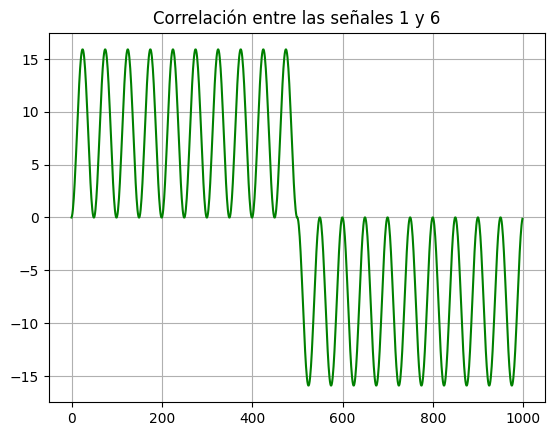

In [36]:
### Correlación entre las señales 1 y 6 ###

correlacion_16 = np.correlate (ss_1, pulso, mode = 'full')
plt.plot (np.arange (len(correlacion_16)), correlacion_16, linestyle='-', color='green')
plt.title ("Correlación entre las señales 1 y 6")
plt.grid (True)

#### 4) *Demostrando la propiedad: 2⋅ sin(α)⋅ sin(β) = cos(α-β) - cos(α+β)*

![Demo](foto.jpg)

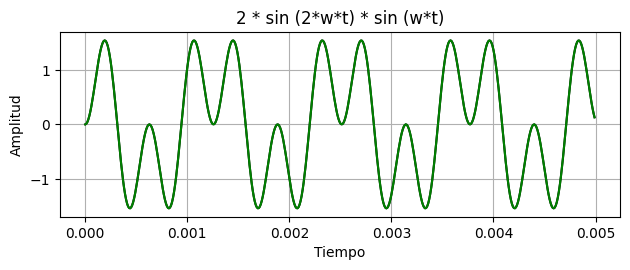

In [37]:
w = 5000
xx_1 = np.cos (w*tt) - np.cos (3*w*tt)
xx_2 = 2 * np.sin (2*w*tt) * np.sin (w*tt)

plt.subplot (2, 1, 1)
plt.plot (tt, xx_1, linestyle='-', color='black')
plt.title ("cos (w*t) - cos (3*w*t)")
plt.xlabel ("Tiempo")
plt.ylabel ("Amplitud")
plt.grid (True)

plt.subplot (2, 1, 1) # de esta manera quedan ambos plots superpuestos, para visualizar por separado cambiar (2, 1, 1) por (2, 1, 2)
plt.plot (tt, xx_2, linestyle='-', color='green')
plt.title ("2 * sin (2*w*t) * sin (w*t)")
plt.xlabel ("Tiempo")
plt.ylabel ("Amplitud")
plt.grid (True)

plt.tight_layout ()
plt.show ()

#### 5) *Trabajo con WAV*


La energía del WAV es 238786963


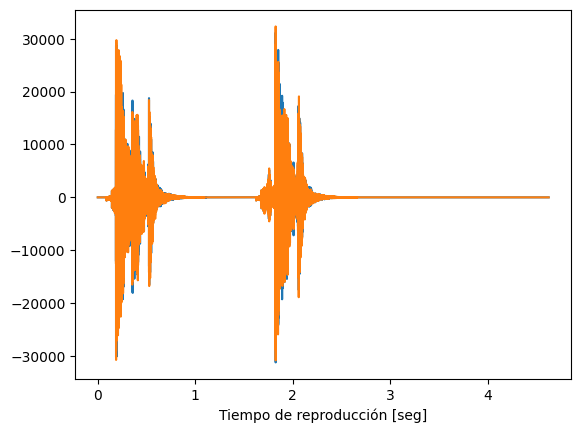

In [39]:
fs_wav, x_wav = wavfile.read ('sfx.wav') # la frecuencia de muestreo del WAV es un dato que viene contenido en el mismo archivo
energia_wav = np.sum (x_wav**2)
print ("\nLa energía del WAV es", energia_wav)

durac = len(x_wav) / fs_wav # si divido la cantidad de muestras por la frecuencia de muestreo, obtengo la duración de la señal
tt_wav = np.linspace (0, durac, len(x_wav)) # linspace divide el intervalo (0, durac) en len(x_wav) partes equiespaciadas
plt.xlabel ("Tiempo de reproducción [seg]")
plt.ylabel ("")
plt.plot (tt_wav, x_wav)
plt.show ()

from IPython.display import Audio
Audio ('sfx.wav')

## Conclusiones
Las señales fueron sintetizadas y graficadas con éxito. En principio estas señales no corresponden a ninguna medición física real, por ende, las unidades de su amplitud estan sujetas a una magnitud ficticia, pudiendo ser el Volt para el caso de una señal eléctrica, el dB para una señal de sonido, etc. Se observa un aumento en la potencia según aumenta la amplitud de la señal, como es el caso entre la Señal 1 y su versión amplificada, la Señal 2. Las señales cuyo producto interno (calculado por np.inner) es nulo (aproximado por np.isclose) verifican que son ortogonales entre sí. En cuanto a la correlación, a raíz de los gráficos generados pueden sacarse fuertes conclusiones sobre la relación entre las señales. Por un lado, la altura del pico máximo da una idea de "cuán" similares son las señales en un determinado tiempo. Cabe aclarar que para la autocorrelación, es decir, la correlación de una señal consigo misma, estos picos irán disminuyendo a medida que nos alejamos del centro, pues lo que en realidad se está comparando es la señal, llámese x[n] con una versión desplazada de ella, x[n-k]. La repetición de estos picos implica que la similitud se da de manera periódica. Por otro lado, si ubicamos un eje vertical de referencia justo en el punto medio del eje temporal, deberíamos poder ubicar en sus alrededores el punto de simetría (lineal o invertida) de la señal de autocorrelación. De estar este punto centrado en dicho eje, se puede concluir que no hay desfasaje entre las señales. Caso contrario, existe un desfasaje entre ellas. Por otro lado, se demostró la propiedad trigonométrica 2 sin(α) sin(β) = cos(α-β) - cos(α+β) y se verificó gráficamente que se cumple para cualquier frecuencia α y β con α = 2β. Finalmente, se leyó un archivo de audio .WAV con el objetivo de graficarlo y calcular su energía. Observar que en él hay presentes dos señales superpuestas y aparentemente similares (una de ellas color azul, detrás de la naranja). Al examinar la variable x_wav, no nos encontramos con un simple vector con sus valores de amplitud, sino con un array de dos columnas, donde cada una contiene los datos del canal izquierdo y derecho del audio, pues este resulta ser *Stereo*. Lo que se observa en el gráfico es la superposición de ambos canales. Como la amplitud de la señal corresponde a una *unidad digital*, la potencia calculada resulta ser adimensional, dándome meramente una noción de cuán "enérgico" es el audio. Esto será especialmente util a la hora de comprar con otra señal, pues de por sí no corresponde con magnitud física alguna.

## Autoevaluación del aprendizaje
Resolví la tarea con cierta seguridad, al menos en cuanto a los conceptos teóricos. Las mayores complicaciones vinieron con la implementación del código. Me costó mucho comprender cómo se ve en un gráfico la relación entre la frecuencia de muestreo, la cantidad de muestras y la frecuencia de la señal. Terminé por descubrir una suerte de ecuación que me sirvió mucho, pero me gustaría entender su sentido físico: $ \frac {f}{\bigtriangleup f} = $ # de oscilaciones visibles. También le di muchísimas vueltas a la señal de pulso, no podía "encastrarla" en mi vector de tiempo, hasta que encontré en un foro que podía filtrar las componentes que cumplan con un cierto tt[condición] y asignarles un valor. Por otro lado, aprendí mucha sintaxis de Python y Markdown, y afiancé algunos conceptos como potencia de una señal, correlación y producto interno, que hasta ahora me parecían super abstractos. Por último, dar créditos a Gemini AI por prácticamente explicarme todo el punto BONUS (desconocía la existencia la librería scipy.io y sus funciones). Sin embargo, considero que este último quedó muy incompleto, no quise agregar las líneas que realmente no comprendí y llevan a que tanto la potencia como la escala de amplitud (desconozco sus unidades) resulten algo más razonables. Aún tengo muchas dudas con la redacción de este informe, en especial con la introducción teórica y las conclusiones. Espero correcciones, gracias!